In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r'C:\Users\USER\Downloads\heart_disease_uci.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [9]:
import pandas as pd

# Asumsikan df sudah didefinisikan sebelumnya
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

print(outliers)


{'id': 0, 'age': 0, 'trestbps': 28, 'chol': 183, 'thalch': 2, 'oldpeak': 16, 'ca': 20, 'num': 0}


In [10]:
desc_stats = df[numerical_columns].agg(['mean', 'median', 'std', 'var', 'skew', 'kurt'])
mode_values = df[numerical_columns].mode().iloc[0]
print(desc_stats)
print('mode:', mode_values)

                  id        age    trestbps          chol      thalch  \
mean      460.500000  53.510870  132.132404    199.130337  137.545665   
median    460.500000  54.000000  130.000000    223.000000  140.000000   
std       265.725422   9.424685   19.066070    110.780810   25.926276   
var     70610.000000  88.824691  363.515007  12272.387943  672.171813   
skew        0.000000  -0.195994    0.213334     -0.613836   -0.211119   
kurt       -1.200000  -0.382930    2.958664      0.062273   -0.479725   

         oldpeak        ca       num  
mean    0.878788  0.676375  0.995652  
median  0.500000  0.000000  1.000000  
std     1.091226  0.935653  1.142693  
var     1.190775  0.875447  1.305748  
skew    1.041427  1.165978  0.968880  
kurt    1.127069  0.199498 -0.104325  
mode: id            1.0
age          54.0
trestbps    120.0
chol          0.0
thalch      150.0
oldpeak       0.0
ca            0.0
num           0.0
Name: 0, dtype: float64


In [12]:
import pandas as pd
import numpy as np 

df = pd.read_csv(r'C:\Users\USER\Downloads\heart_disease_uci.csv')

numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
correlation_matrix = df[numerical_columns].corr()

correlation_matrix_no_diag = correlation_matrix.where(~np.eye(correlation_matrix.shape[0], dtype=bool))
max_corr = correlation_matrix_no_diag.abs().max().max()

highest_corr_pair = correlation_matrix_no_diag.abs().stack().idxmax()

print("pasangan variable dengan kolerasi tertinggi:", highest_corr_pair)
print("nilai kolerasi teringgi:",max_corr)

pasangan variable dengan kolerasi tertinggi: ('ca', 'num')
nilai kolerasi teringgi: 0.5162163234345344


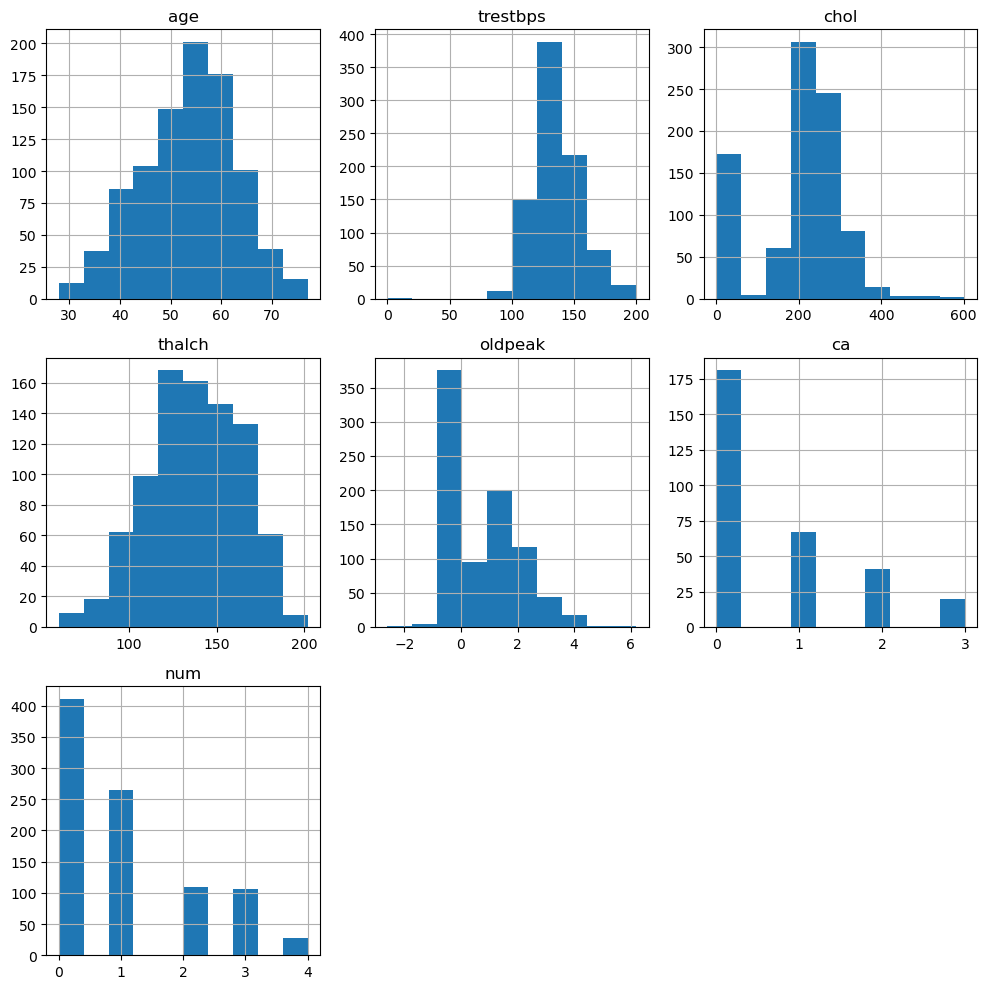

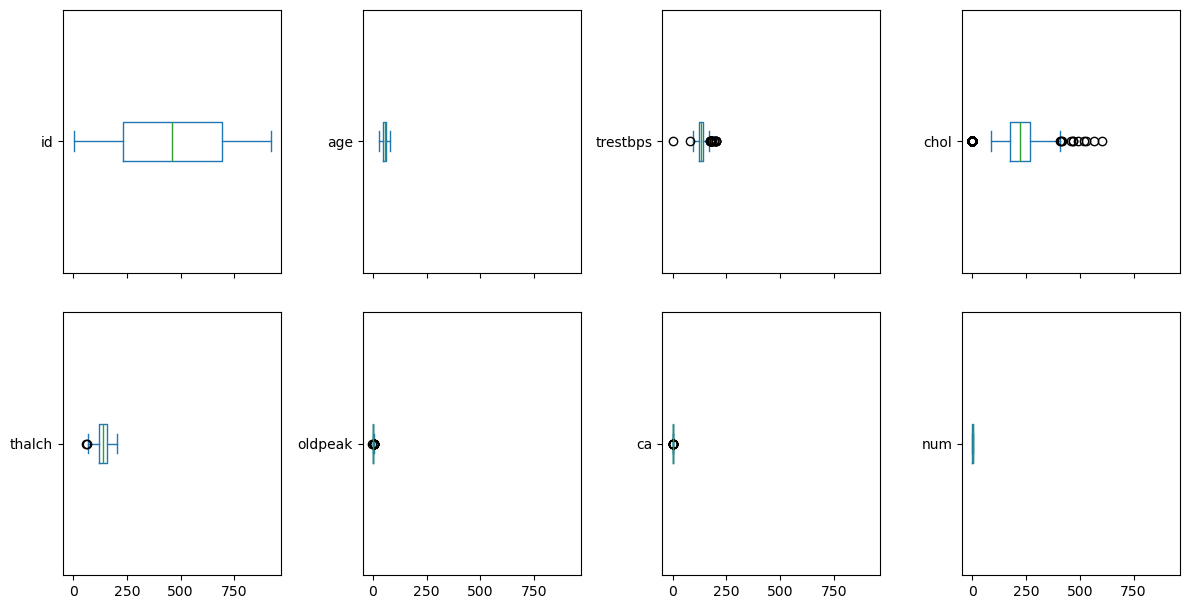

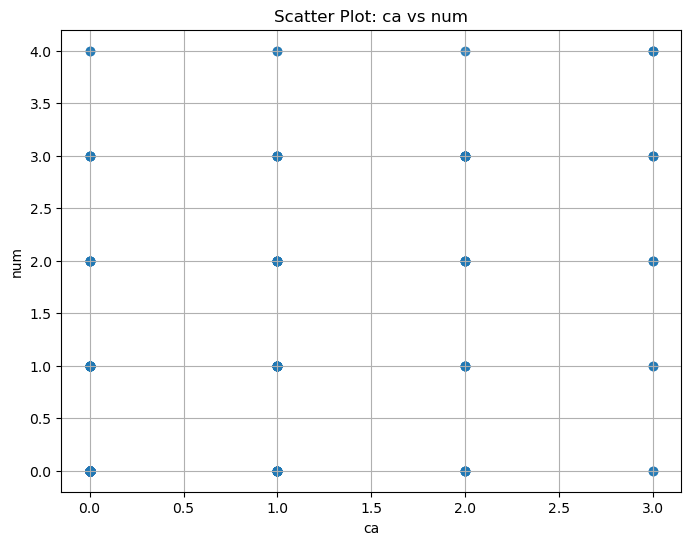

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom numerik (sesuaikan dengan kolom numerik di dataset)
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

df[numerical_columns].hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

numerical_columns = df.select_dtypes(include=['number']).columns

df[numerical_columns].plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 12), vert=False)

plt.tight_layout()
plt.show()

# Membuat scatter plot untuk ca vs num
plt.figure(figsize=(8, 6))
plt.scatter(df['ca'], df['num'], alpha=0.6)
plt.title('Scatter Plot: ca vs num')
plt.xlabel('ca')
plt.ylabel('num')
plt.grid(True)
plt.show()


In [ ]:
LAPORAN PRATIKUM
- Hasil eksplorasi dan analisis data bekerja dan menampilkan 15 kolom hasil
- Korelasi kuat antar bariabel nya adalah ca dan num dengan nilai korelasi tertinggi adalah 0.516
- Terdapat beberapa outliers seperti trestbps: 128 atau chol: 183
- Terdapat beberapa missing value juga seperti trestbps: 59 atau chol: 30


Hasil eksplorasi data menunjukkan bahwa distribusi beberapa variabel tidak normal, dengan skewness negatif pada variabel kolesterol dan tekanan darah istirahat. Selain itu, ditemukan adanya missing values yang signifikan pada variabel seperti ca dan thal, yang perlu penanganan lebih lanjut sebelum analisis lanjutan dilakukan. Korelasi tertinggi dalam dataset ini ditemukan antara variabel ca (jumlah pembuluh darah utama yang diwarnai) dan num (indikator keparahan penyakit), dengan nilai korelasi sebesar 0,516, menunjukkan hubungan yang cukup kuat antara dua variabel ini. Penemuan lainnya mencakup adanya outliers pada variabel tertentu seperti oldpeak, yang juga memerlukan perhatian untuk menghindari bias dalam analisis.